**versión con botones anterior-siguiente**

In [9]:
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from operator import itemgetter
import pandas as pd
import numpy as np
from bitarray import bitarray

In [5]:
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Load Data
cap = pd.read_csv('capitales.csv')
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Recorrido sobre las capitales de Argentina"),
    
    html.Button('Siguiente', id='btn-siguiente', n_clicks=0),
    html.Button('Anterior', id='btn-anterior', n_clicks=0),
    html.Div(id='container-button-basic',
             children='Enter a value and press submit'),
    dcc.Graph(id='graph'),
])
# Define callback to update graph
@app.callback(
    [Output('graph', 'figure'),
     dash.dependencies.Output('container-button-basic', 'children')],
    [Input("btn-siguiente", 'n_clicks'),
     Input("btn-anterior", 'n_clicks')],
)

def update_figure(n_sig, n_ant):
    changed_id = [p['prop_id'] for p in dash.callback_context.triggered][0]
    pos_actual = n_sig - n_ant
    if 'btn-siguiente.n_clicks' in changed_id:
        fig = px.scatter_mapbox(cap, lat="latitud", lon="longitud", hover_name="capital", hover_data=["capital"],
                        color_discrete_sequence=["red"], zoom=3, height=500, width=500)
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.update_layout(mapbox_style="open-street-map")
        fig.add_trace(
            go.Scattermapbox(
                mode = "lines",
                lon = cap['longitud'][:pos_actual + 1],
                lat = cap['latitud'][:pos_actual + 1],
            )
        )
        return fig, f'pos_actual = {pos_actual} -- n_sig {n_sig}, n_ant {n_ant} -- changed_id {changed_id}'
        
    elif 'btn-anterior.n_clicks' in changed_id:  
        if pos_actual > len(cap):
            raise dash.exceptions.PreventUpdate
        else:    
            fig = px.scatter_mapbox(cap, lat="latitud", lon="longitud", hover_name="capital", hover_data=["capital"],
                            color_discrete_sequence=["red"], zoom=3, height=500, width=500)
            fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
            fig.update_layout(mapbox_style="open-street-map")
            fig.add_trace(
                go.Scattermapbox(
                    mode = "lines",
                    lon = cap['longitud'][:pos_actual + 1],
                    lat = cap['latitud'][:pos_actual + 1],
                )
            )
            return fig, f'pos_actual = {pos_actual} -- n_sig {n_sig}, n_ant {n_ant} -- changed_id {changed_id}'
    else:
        fig = px.scatter_mapbox(cap, lat="latitud", lon="longitud", hover_name="capital", hover_data=["capital"],
                            color_discrete_sequence=["red"], zoom=3, height=500, width=500)
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.update_layout(mapbox_style="open-street-map")
        return fig, f'pos_actual = {pos_actual} -- n_sig {n_sig}, n_ant {n_ant} -- changed_id {changed_id}'

# Run app and display result inline in the notebook
app.run_server(mode='jupyterlab', port=8080)

**Versión con slider**

In [10]:
import dash
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Load Data
cap = pd.read_csv('capitales.csv')

app = JupyterDash(__name__,
external_stylesheets=[dbc.themes.BOOTSTRAP])

# Build App
app.layout = html.Div(
    [ 
        dbc.NavbarSimple(
            children=[
                dbc.NavItem(dbc.NavLink("Ejercicio 1", href="#", className='disabled')),
                dbc.NavItem(dbc.NavLink("Ejercicio 2", href="ejercicio-2.ipynb")),
                dbc.NavItem(dbc.NavLink("Ejercicio 3", href="ejercicio-3.ipynb"))
            ],
            brand="GRUPO 1 - TRABAJO PRÁCICO N°3",
            color="primary",
            dark=True,
        ),
        dbc.Row(
            dbc.Col(
                html.H3("Recorrido sobre las capitales de Argentina")
            )
       ),
        dbc.Row(
            [
                dbc.Col(
                    dcc.Slider(
                        id='slider',
                        vertical=True,
                        min=1,
                        max=23,
                        marks={i: str(cap['capital'][i]) for i in range(1, len(cap))},
                        value=23,
                        verticalHeight=800
                        )
                    ),
                    dbc.Col(dcc.Graph(id='graph'))
            ]
        )
    ]
)
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    Input('slider', 'value'),
)

def update_figure(slider_value):
    pos_actual = slider_value
    fig = px.scatter_mapbox(cap, lat="latitud", lon="longitud", hover_name="capital", hover_data=["capital"],
                    color_discrete_sequence=["red"], zoom=3, height=400, width=500)
    
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_layout(mapbox_style="open-street-map")
    
    fig.add_trace(
        go.Scattermapbox(
            mode = "lines",
            lon = cap['longitud'][:pos_actual],
            lat = cap['latitud'][:pos_actual],
        )
    )
    return fig

# Run app and display result inline in the notebook
app.run_server(mode='jupyterlab', port=8080)

In [22]:
import dash
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Since we're adding callbacks to elements that don't exist in the app.layout,
# Dash will raise an exception to warn us that we might be
# doing something wrong.
# In this case, we're adding the elements through a callback, so we can ignore
# the exception.
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP], suppress_callback_exceptions=True)

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='contenido')
])

pagina_inicio = html.Div(
    [
        dbc.NavbarSimple(
                children=[
                    dbc.NavItem(dbc.NavLink("Ejercicio 1", href="/ejercicio-1")),
                    dbc.NavItem(dbc.NavLink("Ejercicio 2", href="/page-2")),
                    dbc.NavItem(dbc.NavLink("Ejercicio 3", href="/page-3"))
                ],
                brand="GRUPO 1 - TRABAJO PRÁCICO N°3",
                color="primary",
                dark=True,
        ),
        html.Div(id="pagina-inicio-content"),
        dbc.Jumbotron(
            [
                html.H3("Grupo 1 - Problema del Viajante", className="display-3"),
                html.H3(
                    "Integrantes:"
                ),
                html.P(
                    "D'Angelo Agustín, Fabbri Lucía, Lostumbo Julian, Serenelli Lucio"
                ),
                html.P(dbc.Button("Continuar", color="primary", href="/page-1"), className="lead"),
            ]
        )
    ]
)

ejercicio_1_layout = html.Div(
    [
        dbc.NavbarSimple(
            children=[
                dbc.NavItem(dbc.NavLink("Ejercicio 1", href="/ejercicio-1")),
                dbc.NavItem(dbc.NavLink("Ejercicio 2", href="/ejercicio-2")),
                dbc.NavItem(dbc.NavLink("Ejercicio 3", href="/ejercicio-3"))
            ],
            brand="Grupo 1 - Ejercicio 1",
            color="primary",
            dark=True,
        ),
        html.Div(id="ejercicio-1-content"),
        html.P("primera linea de la pagina 1"),
        html.P("segunda linea de la pagina 1")         
    ]
)
ejercicio_2_layout = html.Div(
    [
        dbc.NavbarSimple(
            children=[
                dbc.NavItem(dbc.NavLink("Ejercicio 1", href="/ejercicio-1")),
                dbc.NavItem(dbc.NavLink("Ejercicio 2", href="/ejercicio-2")),
                dbc.NavItem(dbc.NavLink("Ejercicio 3", href="/ejercicio-3"))
            ],
            brand="Grupo 1 - Ejercicio 2",
            color="primary",
            dark=True,
        ),
        html.Div(id="ejercicio-2-content"),
        html.P("primera linea de la pagina 2"),
        html.P("segunda linea de la pagina 2")
    ]
)
ejercicio_3_layout = html.Div(
    [
        dbc.NavbarSimple(
            children=[
                dbc.NavItem(dbc.NavLink("Ejercicio 1", href="/ejercicio-1")),
                dbc.NavItem(dbc.NavLink("Ejercicio 2", href="/ejercicio-2")),
                dbc.NavItem(dbc.NavLink("Ejercicio 3", href="/ejercicio-3"))
            ],
            brand="Grupo 1 - Ejercicio 3",
            color="primary",
            dark=True,
        ),
        html.Div(id="ejercicio-3-content"),
        html.P("primera linea de la pagina 3"),
        html.P("segunda linea de la pagina 3")
    ]
)

@app.callback(dash.dependencies.Output('ejercicio-1-content', 'children'),
              [dash.dependencies.Input('ejercicio-1-dropdown', 'value')])


@app.callback(dash.dependencies.Output('ejercicio-2-content', 'children'),
              [dash.dependencies.Input('ejercicio-2-radios', 'value')])

@app.callback(dash.dependencies.Output('ejercicio-3-content', 'children'),
              [dash.dependencies.Input('ejercicio-3-radios', 'value')])

# Update the index
@app.callback(dash.dependencies.Output('contenido', 'children'),
              [dash.dependencies.Input('url', 'pathname')])

def display_page(pathname):
    if pathname == '/ejercicio-1':
        return ejercicio_1_layout
    elif pathname == '/ejercicio-2':
        return ejercicio_2_layout
    elif pathname == '/ejercicio-3':
        return ejercicio_3_layout
    else:
        return pagina_inicio

app.run_server(mode='jupyterlab', port=8080)

In [19]:
cap = pd.read_csv('capitales.csv')
def permutacion_binaria(n, m):
  # función recursiva que genera permutaciones en cadenas binarias de longitud n, con m cantidad de unos
  # Detalle de implementacion en python: la palabra clave yield es el análogo de return, pero retorna un objeto generador
    if m < n:                                                  
        if m > 0:
            for x in permutacion_binaria(n-1,m-1):
                yield bitarray([1]) + x
            for x in permutacion_binaria(n-1,m):
                yield bitarray([0]) + x
        else:
            yield n * bitarray('0') 
    else:
        yield n * bitarray('1')

def generar_combinaciones(n):
 
    # función que genera todas las cadenas binarias posibles de longitud n,
    # el valor de n debe indicarse como parámetro de la función.
    n = int(n)
    cadenas = []
    for i in range(n):
        for cadena in permutacion_binaria(n,i):
            cadenas.append((cadena))
 
    for index, cadena in enumerate(cadenas):
        cadenas[index] = [int(xi) for xi in cadena.tolist()]   # convertimos el arreglo de bits en una lista de python
    for index, cadena in enumerate(cadenas):
        cadenas[index] = ''.join([str(xi) for xi in cadena])   # convertimos la lista de python en un string
 
    cadenas.append('1' * n)
    #se devuelve una lista con las combinaciones posibles de '1's y '0's donde cada bit representa un elemento y si ese elemento se encuentra en la combinacion o no   
    return cadenas

In [122]:
frames = [go.Frame(data=[go.Scattermapbox(mode='lines',lon=[cap['longitud'][0], cap['longitud'][1]], lat=[cap['latitud'][0], cap['latitud'][1]])])]
frames.append(go.Frame(data=[go.Scattermapbox(mode='lines',lon=[cap['longitud'][1], cap['longitud'][2]], lat=[cap['latitud'][1], cap['latitud'][2]])]))
frames.append(go.Frame(data=[go.Scattermapbox(mode='lines',lon=[cap['longitud'][2], cap['longitud'][3]], lat=[cap['latitud'][2], cap['latitud'][3]])]))


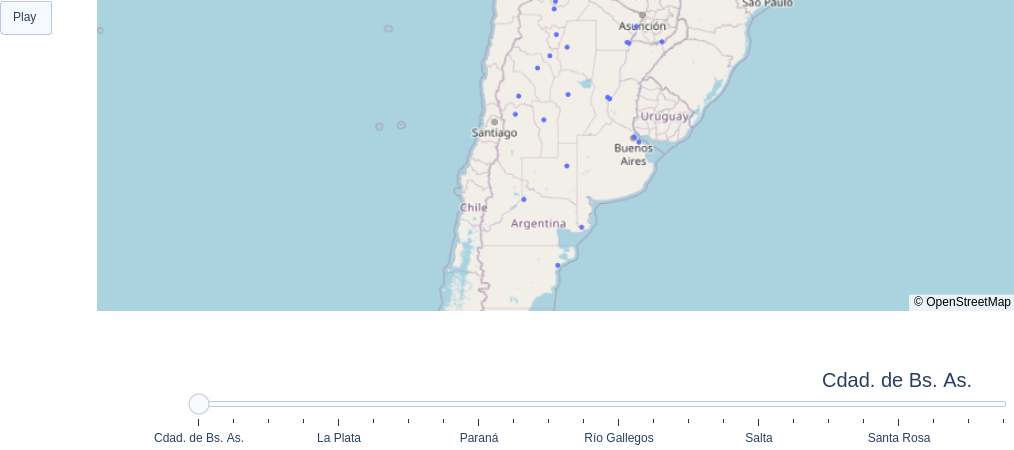

In [123]:
# primero, dibujo los cuadros que se animarán, cada uno es un mapa que tiene más trayectorias que el anterior


# dibujo la figura, y le asigno los cuadros
fig = go.Figure(
    data=go.Scattermapbox(
        lat=cap['latitud'], 
        lon=cap['longitud'],
        text=cap['capital'],
        hoverinfo='text'
    ),
    layout=go.Layout( #dibujo el boton de play
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(
                label="Play",
                method="animate",
                args=[None])])],
    ),
    frames=frames
)

steps = [{
    'method': 'animate',
    'label': cap['capital'][k],
    'args': [{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate'}
    ],
} for k in range(len(cap))]

fig['layout']['sliders'] = [{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': steps
}]


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        center=dict(
            lat=-35.876958,
            lon=-65.293389
        ),
        zoom=3
    ),
)
fig.show()

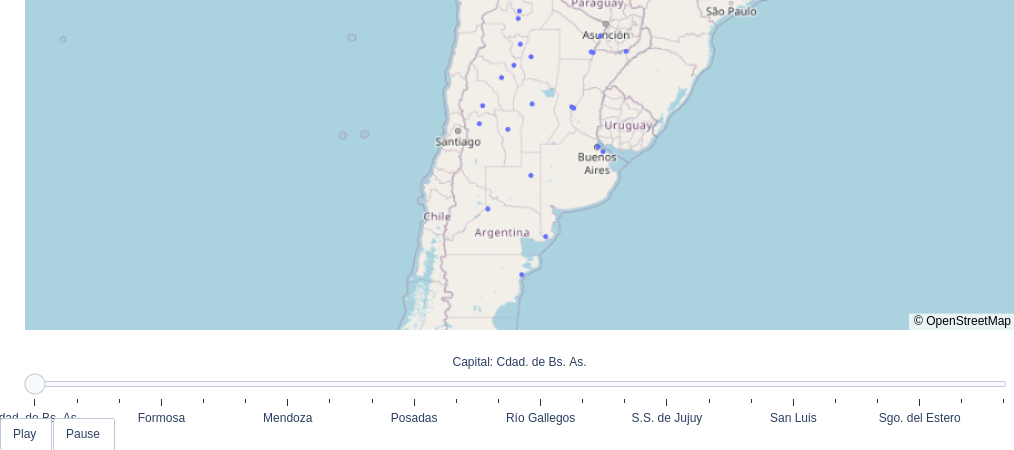

In [125]:
# primero, dibujo los cuadros que se animarán, cada uno es un mapa que tiene más trayectorias que el anterior
mantener_trazo = False
frames = []
if mantener_trazo:
    for k in range(len(cap)):
        frames.append(go.Frame(data=[go.Scattermapbox(mode='lines', lat=cap['latitud'][:k+1],  lon=cap['longitud'][:k+1])], name=f'frame{k}'))
else:
    for k in range(len(cap)-1):
        frames.append(go.Frame(data=[go.Scattermapbox(mode='lines', lat=[cap['latitud'][k], cap['latitud'][k+1]],  lon=[cap['longitud'][k], cap['longitud'][k+1]])], name=f'frame{k}'))
# dibujo la figura, y le asigno los cuadros
fig = go.Figure(
    data=go.Scattermapbox(
        lat=cap['latitud'], 
        lon=cap['longitud'],
        text=cap['capital'],
        hoverinfo='text'
    ),
    layout=go.Layout(),
    frames=frames
)


updatemenus = [dict(
        buttons = [
            dict(
                args = [None, {"frame": {"duration": 500, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 300}}],
                label = "Play",
                method = "animate"
                ),
            dict(
                 args = [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                label = "Pause",
                method = "animate"
                )
        ],
        direction = "left",
        pad = {"r": 10, "t": 87},
        showactive = False,
        type = "buttons",
        x = 0.1,
        xanchor = "right",
        y = 0,
        yanchor = "top"
    )]  

sliders = [dict(steps = [dict(method= 'animate',
                              args= [[f'frame{k}'],                           
                              dict(mode= 'immediate',
                                   frame=dict(duration=400, redraw=True),
                                   transition=dict(duration= 0))
                                 ],
                              label=f'{cap["capital"][k]}'
                             ) for k in range(len(cap))], 
                active=0,
                transition={'duration':500 , 'easing': 'cubic-in-out'},
                x=0, # slider starting position  
                y=0, 
                currentvalue=dict(font=dict(size=12), 
                                  prefix='Capital: ', 
                                  visible=True, 
                                  xanchor= 'center'
                                 ),  
                len=1.0) #slider length
           ]
fig.update_layout(updatemenus = updatemenus, sliders = sliders)


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        center=dict(
            lat=-35.876958,
            lon=-65.293389
        ),
        zoom=3
    ),
)
fig.show()

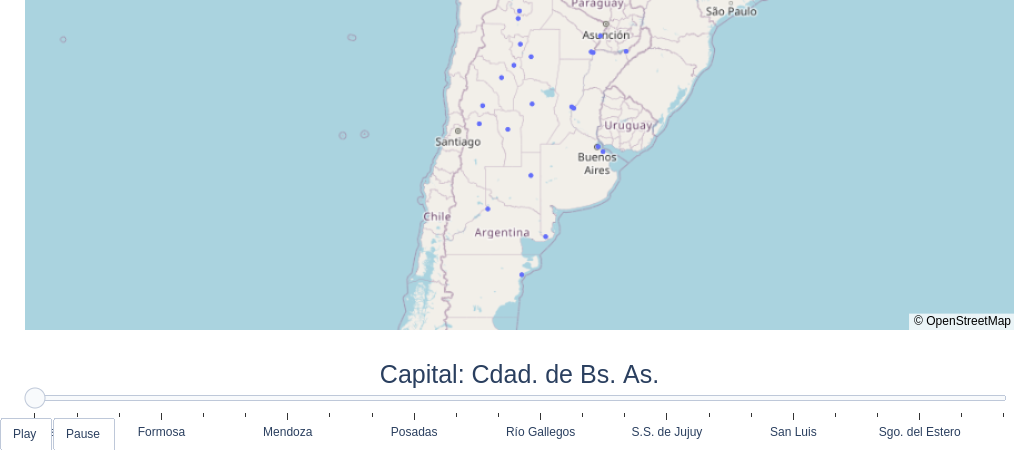

In [133]:
# primero, dibujo los cuadros que se animarán, cada uno es un mapa que tiene más trayectorias que el anterior
mantener_trazo = False
frames = []
if mantener_trazo:
    for k in range(len(cap)):
        frames.append(go.Frame(data=[go.Scattermapbox(mode='lines', lat=cap['latitud'][:k+1],  lon=cap['longitud'][:k+1])], name=f'frame{k}'))
else:
    for k in range(len(cap)-1):
        frames.append(go.Frame(data=[go.Scattermapbox(mode='lines', lat=[cap['latitud'][k], cap['latitud'][k+1]],  lon=[cap['longitud'][k], cap['longitud'][k+1]])], name=f'frame{k}'))
# dibujo la figura, y le asigno los cuadros
fig = go.Figure(
    data=go.Scattermapbox(
        lat=cap['latitud'], 
        lon=cap['longitud'],
        text=cap['capital'],
        hoverinfo='text'
    ),
    layout=go.Layout(),
    frames=frames
)


updatemenus = [dict(
        buttons = [
            dict(
                args = [None, {"frame": {"duration": 1000, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 500, 'easing': 'cubic-in-out'}}],
                label = "Play",
                method = "animate"
                ),
            dict(
                 args = [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                label = "Pause",
                method = "animate"
                )
        ],
        direction = "left",
        pad = {"r": 10, "t": 87},
        showactive = False,
        type = "buttons",
        x = 0.1,
        xanchor = "right",
        y = 0,
        yanchor = "top"
    )]  

sliders = [dict(steps = [dict(method= 'animate',
                              args= [[f'frame{k}'],                           
                              dict(mode= 'immediate',
                                   frame=dict(duration=400, redraw=True),
                                   transition=dict(duration= 0))
                                 ],
                              label=f'{cap["capital"][k]}'
                             ) for k in range(len(cap))], 
                active=0,
                transition={'duration':500 , 'easing': 'cubic-in-out'},
                x=0, # slider starting position  
                y=0, 
                currentvalue=dict(font=dict(size=25), 
                                  prefix='Capital: ', 
                                  visible=True, 
                                  xanchor= 'center'
                                 ),  
                len=1.0) #slider length
           ]
fig.update_layout(updatemenus = updatemenus, sliders = sliders)


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        center=dict(
            lat=-35.876958,
            lon=-65.293389
        ),
        zoom=3
    ),
)
fig.show()